ld: warning: -pie being ignored. It is only used when linking a main executable
ld: unsupported tapi file type '!tapi-tbd' in YAML file '/Library/Developer/CommandLineTools/SDKs/MacOSX10.15.sdk/usr/lib/libSystem.tbd' for architecture x86_64
clang-10: error: linker command failed with exit code 1 (use -v to see invocation)
WARNING    Cannot use Cython, a test compilation failed: command '/Users/ozdil/anaconda3/envs/bmnn/bin/x86_64-apple-darwin13.4.0-clang++' failed with exit code 1 (LinkError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


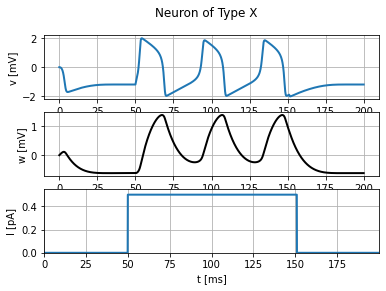

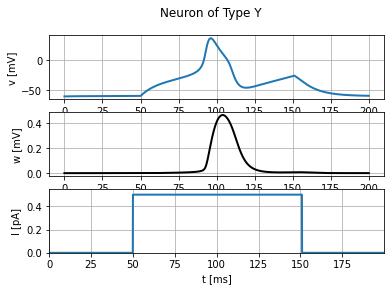

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons

# create an input current
input_current = input_factory.get_step_current(50, 150, 1.*b2.ms, 0.5*b2.pA)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 200*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(input_current, 200*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

# 8.1. Exercise: Probing Type I and Type II neuron models

This exercise deals not only with Python functions, but with python objects. The classes NeuronX and NeuronY both are neurons, that have different dynamics: one is Type I and one is Type II. Finding out which class implements which dynamics is the goal of the exercise.

In [2]:
neurons.neurontype_random_reassignment()

WARNING    /Users/ozdil/anaconda3/envs/bmnn/lib/python3.9/site-packages/neurodynex3/neuron_type/neurons.py:74: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.axis((0, t.max(), 0, I_ext.max() * 1.1))
 [py.warnings]


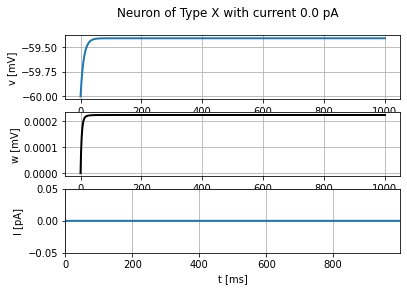

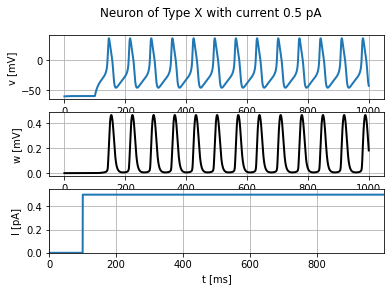

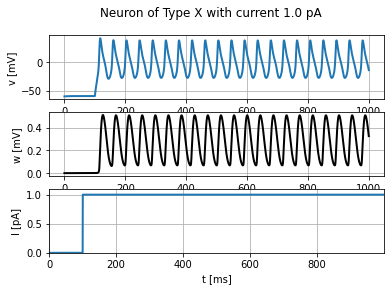

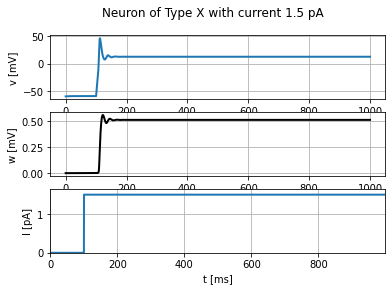

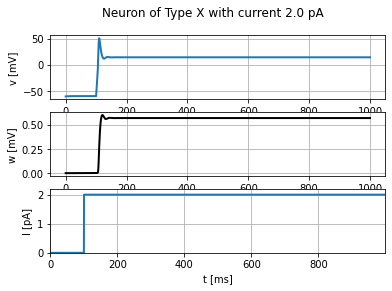

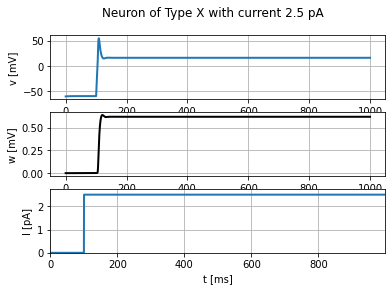

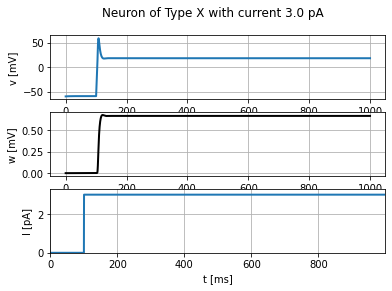

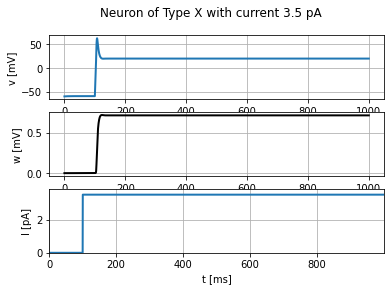

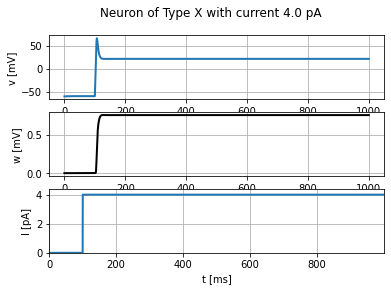

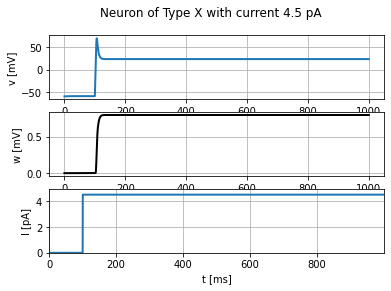

In [3]:
# First neuron
current = np.arange(0, 5, 0.5)

for I in current:
    # create an input current
    input_current = input_factory.get_step_current(100, 1000, 1.*b2.ms, I*b2.pA)

    # get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
    a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
    # simulate it and get the state variables
    state_monitor = a_neuron_of_type_X.run(input_current, 1000*b2.ms)
    # plot state vs. time
    neurons.plot_data(state_monitor, title="Neuron of Type X with current {} pA".format(I))
    plt.show()

WARNING    /Users/ozdil/anaconda3/envs/bmnn/lib/python3.9/site-packages/neurodynex3/neuron_type/neurons.py:74: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.axis((0, t.max(), 0, I_ext.max() * 1.1))
 [py.warnings]


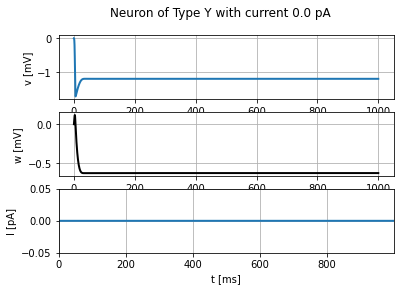

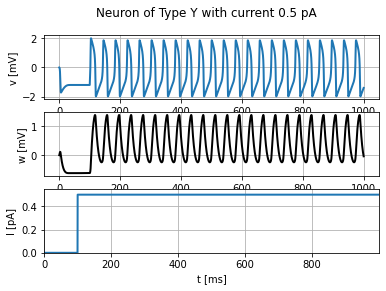

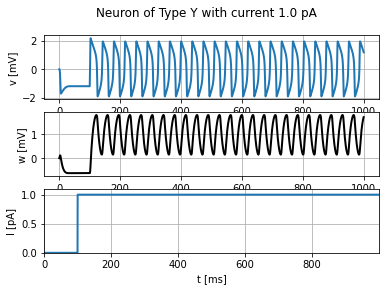

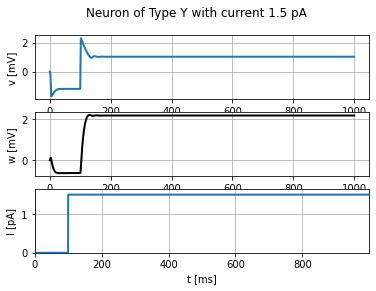

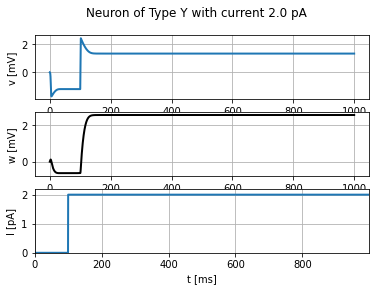

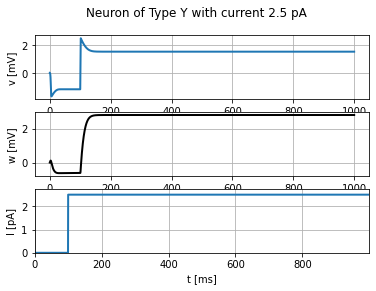

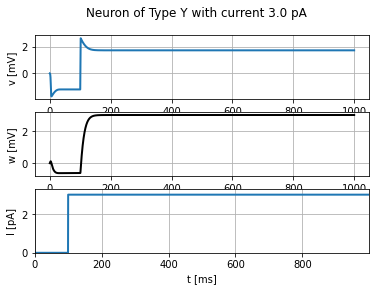

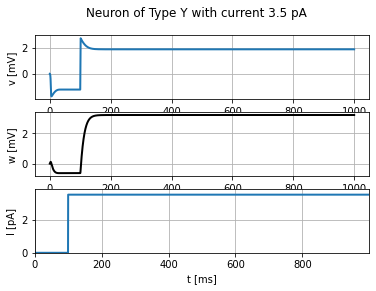

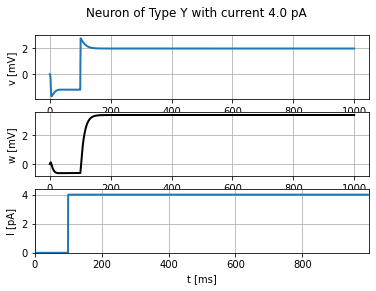

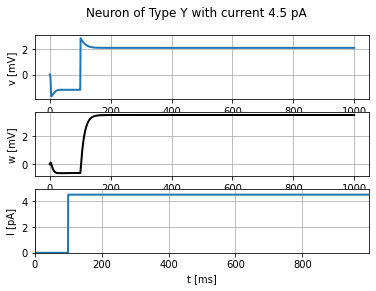

In [4]:
# Second neuron
current = np.arange(0, 5, 0.5)

for I in current:
    # create an input current
    input_current = input_factory.get_step_current(100, 1000, 1.*b2.ms, I*b2.pA)

    # get one instance of class NeuronY and save that object in the variable 'a_neuron_of_type_X'
    a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
    # simulate it and get the state variables
    state_monitor = a_neuron_of_type_Y.run(input_current, 1000*b2.ms)
    # plot state vs. time
    neurons.plot_data(state_monitor, title="Neuron of Type Y with current {} pA".format(I))
    plt.show()

# 8.2. Exercise: f-I curves

In this exercise you will write a python script that plots the f-I curve for type I and type II neuron models.

In [5]:
help(spike_tools.get_spike_time)

Help on function get_spike_time in module neurodynex3.tools.spike_tools:

get_spike_time(voltage_monitor, spike_threshold)
    Detects the spike times in the voltage. Here, the spike time is DEFINED as the value in
    voltage_monitor.t for which voltage_monitor.v[idx] is above threshold AND
    voltage_monitor.v[idx-1] is below threshold (crossing from below).
    Note: currently only the spike times of the first column in voltage_monitor are detected. Matrix-like
    monitors are not supported.
    Args:
        voltage_monitor (StateMonitor): A state monitor with at least the fields "v: and "t"
        spike_threshold (Quantity): The spike threshold voltage. e.g. -50*b2.mV
    
    Returns:
        A list of spike times (Quantity)



In [6]:
def get_firing_rate(state_monitor, spike_threshold):
    spike_times = spike_tools.get_spike_time(state_monitor, spike_threshold=0*b2.mV)
    if len(spike_times) >= 2:
        firing_rate = float((len(spike_times)-1)/(spike_times[-1]-spike_times[0]))
    else: 
        return 0
    return firing_rate

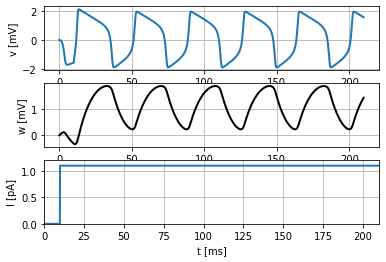

Firing rate is: 26.427061310782236 

nr of spikes: 6
mean ISI: 0.03784
ISI variance: 7.743999999999992e-07
spike freq: 26.427061310782243
spike times: [ 11.7  51.3  88.7 126.1 163.5 200.9] ms
ISI: [39.6 37.4 37.4 37.4 37.4] ms


(array([ 11.7,  51.3,  88.7, 126.1, 163.5, 200.9]) * msecond,
 array([39.6, 37.4, 37.4, 37.4, 37.4]) * msecond,
 37.84 * msecond,
 26.42706131 * hertz,
 0.7744 * msecond2)

In [18]:
input_current = input_factory.get_step_current(10, 210, b2.ms, 1.1*b2.pA)
state_monitor = a_neuron_of_type_Y.run(input_current, 210*b2.ms)
neurons.plot_data(state_monitor)

spike_times = spike_tools.get_spike_time(state_monitor, spike_threshold=0*b2.mV)
firing_rate = get_firing_rate(state_monitor, spike_threshold=0)
print("Firing rate is: {} \n".format(firing_rate))
# Check if correct 
spike_tools.pretty_print_spike_train_stats(state_monitor, spike_threshold=0*b2.mV)

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fI_curve(NeuronClass):

    plt.figure()  # new figure

    neuron = NeuronClass()  # instantiate the neuron class

    I = np.arange(0.0,1.0,0.01)  # a range of current inputs
    f = []

    # loop over current values
    for I_amp in I:
        # create an input current
        input_current = input_factory.get_step_current(100, 1000, 1.*b2.ms, I_amp*b2.pA)
        state_monitor = neuron.run(input_current, 1000*b2.ms)
        firing_rate = get_firing_rate(state_monitor, 0)
        f.append(firing_rate)

    plt.plot(I, f)
    plt.xlabel('Amplitude of Injecting step current (pA)')
    plt.ylabel('Firing rate (Hz)')
    plt.grid()
    plt.show()

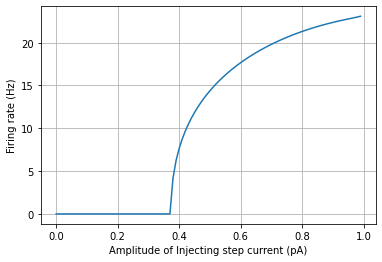

In [23]:
plot_fI_curve(neurons.NeuronX)

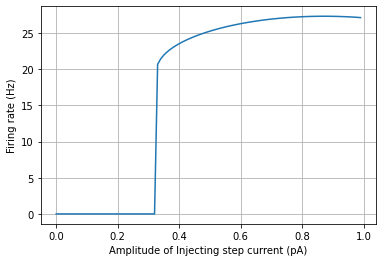

In [24]:
plot_fI_curve(neurons.NeuronY)

Neuron X: Type I

Neuron Y: Type II

In [25]:
# Check
print("a_neuron_of_type_X is : {}".format(a_neuron_of_type_X.get_neuron_type()))
print("a_neuron_of_type_Y is : {}".format(a_neuron_of_type_Y.get_neuron_type()))

a_neuron_of_type_X is : Type I
a_neuron_of_type_Y is : Type II
